<h1>PzAP projekt - Jan Gerenčir

<h2>Uvod

<h4>U sklopu ovog projekta prikazat će se analiza podataka o utrkama Formule 1 i potencijalnom utjecaju vremena na njihove rezultate. Odabrao sam ovu temu za projekt iz kolegija PzAP jer često pratim Formulu 1 i ovo je bila zanimljiva prilika za malo dublju analizu podataka koji utječu na taj sport.
<h4>Kako bismo mogli analizirati utjecaj vremena na rezultate trebamo odabrati kvalitetne datasetove nad kojima ćemo vršiti analizu. Oba dataseta možemo pronaći na stranici Kaggle. Prvi dataset koji će nam poslužiti za prikazivanje podataka o utrkama, vozačima i kvalifikacijskim vremenima je Formula 1 World Championship (1950 - 2024). Dodatni dataset s podacima s vremenom će biti F1 Weather Dataset (2018-2023).

<h3>Linkovi za dataset

<h5>Formula 1 World Championship (1950 - 2024): https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020
<h5>F1 Weather Dataset (2018-2023): https://www.kaggle.com/datasets/quantumkaze/f1-weather-dataset-2018-2023

<h3>Početak impementacije

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


<h5>Prvo je potrebno učitati tri dataseta koje ćemo koristiti a to su datasetovi za: podatke o kvalifikacijama, podatke o vozačima i podatke o utrkama.

In [2]:
qualifying_data = pd.read_csv('qualifying.csv')
drivers_data = pd.read_csv('drivers.csv')
races_data = pd.read_csv('races.csv')

In [3]:
qualifying_data

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236
...,...,...,...,...,...,...,...,...,...
10249,10307,1132,822,15,77,16,1:32.431,\N,\N
10250,10308,1132,825,210,20,17,1:32.905,\N,\N
10251,10309,1132,839,214,31,18,1:34.557,\N,\N
10252,10310,1132,815,9,11,19,1:38.348,\N,\N


<h5>Za svaki učitani dataset pregledavamo koje stupce imaju da možemo odlučiti kako ćemo raditi analizu.

In [4]:
qualifying_data.columns

Index(['qualifyId', 'raceId', 'driverId', 'constructorId', 'number',
       'position', 'q1', 'q2', 'q3'],
      dtype='object')

In [5]:
drivers_data

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
854,856,de_vries,21,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri
856,858,sargeant,2,SAR,Logan,Sargeant,2000-12-31,American,http://en.wikipedia.org/wiki/Logan_Sargeant
857,859,lawson,40,LAW,Liam,Lawson,2002-02-11,New Zealander,http://en.wikipedia.org/wiki/Liam_Lawson


<h5>Stupci za podatke vozača

In [6]:
drivers_data.columns

Index(['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob',
       'nationality', 'url'],
      dtype='object')

In [7]:
races_data

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,1140,2024,20,32,Mexico City Grand Prix,2024-10-27,20:00:00,https://en.wikipedia.org/wiki/2024_Mexico_City...,2024-10-25,18:30:00,2024-10-25,22:00:00,2024-10-26,17:30:00,2024-10-26,21:00:00,\N,\N
1121,1141,2024,21,18,São Paulo Grand Prix,2024-11-03,17:00:00,https://en.wikipedia.org/wiki/2024_S%C3%A3o_Pa...,2024-11-01,14:30:00,2024-11-01,18:30:00,\N,\N,2024-11-02,18:00:00,2024-11-02,14:00:00
1122,1142,2024,22,80,Las Vegas Grand Prix,2024-11-23,06:00:00,https://en.wikipedia.org/wiki/2024_Las_Vegas_G...,2024-11-21,02:30:00,2024-11-21,06:00:00,2024-11-22,02:30:00,2024-11-22,06:00:00,\N,\N
1123,1143,2024,23,78,Qatar Grand Prix,2024-12-01,17:00:00,https://en.wikipedia.org/wiki/2024_Qatar_Grand...,2024-11-29,13:30:00,2024-11-29,17:30:00,\N,\N,2024-11-30,17:00:00,2024-11-30,13:00:00


<h5>Stupci za podatke utrka

In [8]:
races_data.columns

Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time'],
      dtype='object')

<h5>Prvo moramo spojiti tri prethodno definirana dataseta u jedan dataset. To ćemo napraviti sa slijedećom funkcijom. Uzimamo razdoblje podataka od 2018. do 2023. zato što u tom rasponu imamo podatke o vremenu. Podatke spajamo preko stupaca driverId i raceId.

In [9]:
def quali_driver_race_data():
    combined_data = pd.merge(qualifying_data, drivers_data, on='driverId')

    combined_data = pd.merge(combined_data, races_data, on='raceId')

    combined_data = combined_data[(combined_data['year'] >= 2018) & (combined_data['year'] <= 2023)]

    for col in ['q1', 'q2', 'q3']:
        if col in combined_data.columns:
            combined_data[col] = combined_data[col].replace('\\N', None) 
            combined_data[col] = combined_data[col].apply(
                lambda x: sum(float(t) * 60 ** i for i, t in enumerate(reversed(str(x).split(':')))) if pd.notna(x) else None
            )

    if 'dob' in combined_data.columns:
        combined_data['dob'] = pd.to_datetime(combined_data['dob'])

    if 'date' in combined_data.columns:
        combined_data['date'] = pd.to_datetime(combined_data['date'])

    return combined_data

combined_data = quali_driver_race_data()


<h5>Ispis podataka novog dataseta i popis stupaca

In [10]:
combined_data

,qualifyId,raceId,driverId,constructorId,number_x,position,q1,q2,q3,driverRef,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
7516,7540,989,1,131,44,1,82.824,82.051,81.164,hamilton,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
7517,7541,989,8,6,7,2,83.096,82.507,81.828,raikkonen,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
7518,7542,989,20,6,5,3,83.348,81.944,81.838,vettel,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
7519,7543,989,830,9,33,4,83.483,82.416,81.879,max_verstappen,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
7520,7544,989,817,9,3,5,83.494,82.897,82.152,ricciardo,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,10068,1120,832,6,55,16,84.738,NaN,NaN,sainz,...,2023-11-24,09:30:00,2023-11-24,13:00:00,2023-11-25,10:30:00,2023-11-25,14:00:00,\N,\N
10011,10069,1120,825,210,20,17,84.764,NaN,NaN,kevin_magnussen,...,2023-11-24,09:30:00,2023-11-24,13:00:00,2023-11-25,10:30:00,2023-11-25,14:00:00,\N,\N
10012,10070,1120,822,51,77,18,84.788,NaN,NaN,bottas,...,2023-11-24,09:30:00,2023-11-24,13:00:00,2023-11-25,10:30:00,2023-11-25,14:00:00,\N,\N
10013,10071,1120,855,51,24,19,85.159,NaN,NaN,zhou,...,2023-11-24,09:30:00,2023-11-24,13:00:00,2023-11-25,10:30:00,2023-11-25,14:00:00,\N,\N


In [11]:
combined_data.columns

Index(['qualifyId', 'raceId', 'driverId', 'constructorId', 'number_x',
       'position', 'q1', 'q2', 'q3', 'driverRef', 'number_y', 'code',
       'forename', 'surname', 'dob', 'nationality', 'url_x', 'year', 'round',
       'circuitId', 'name', 'date', 'time', 'url_y', 'fp1_date', 'fp1_time',
       'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date',
       'quali_time', 'sprint_date', 'sprint_time'],
      dtype='object')

<h3>Prosječno vrijeme Q1 po stazama

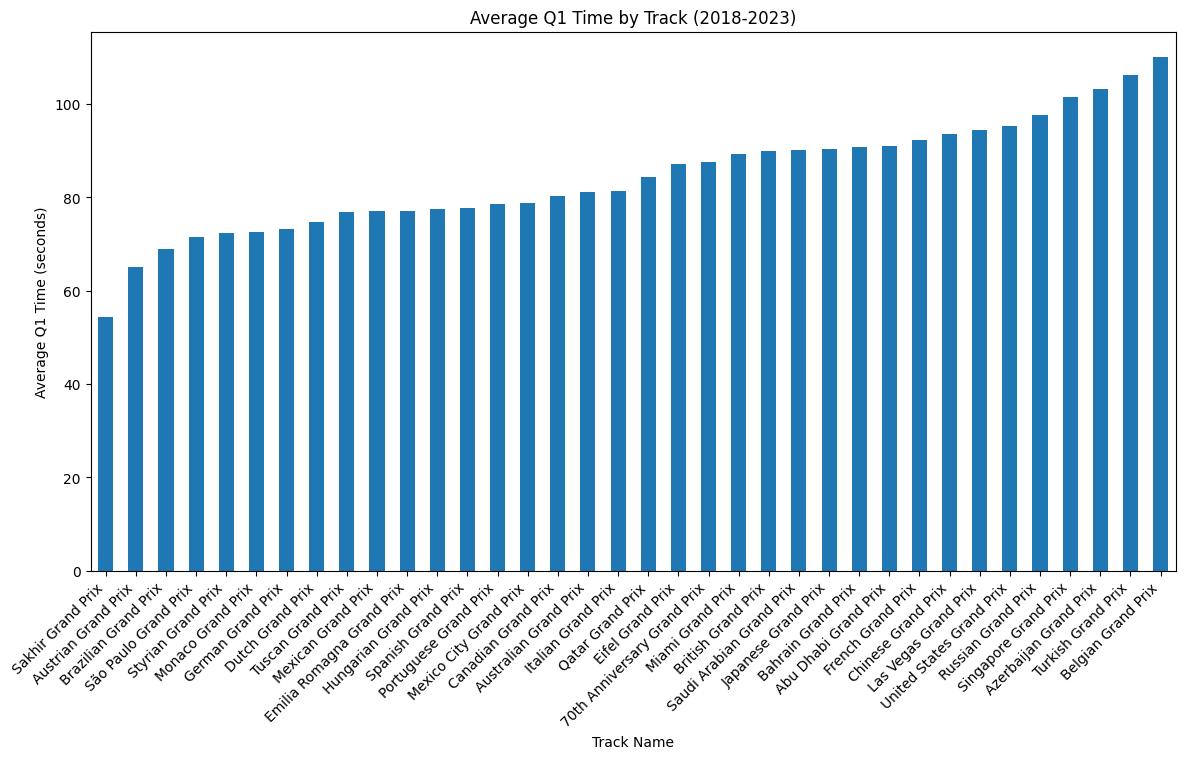

In [12]:

avg_q1_by_track = combined_data.groupby('name')['q1'].mean().sort_values()
avg_q1_by_track.plot(kind='bar', figsize=(14, 7), title='Average Q1 Time by Track (2018-2023)')
plt.xlabel('Track Name')
plt.ylabel('Average Q1 Time (seconds)')
plt.xticks(rotation=45, ha='right')
plt.show()


<h5>Ovom analizom vidimo kako vremena kvalifikacija utrka bitno variraju. Najbrži prosjek ima Sakhir GP dok najsporiji ima Belgian GP.

<h3>Prosječno Q1 vrijeme po rundama sezone

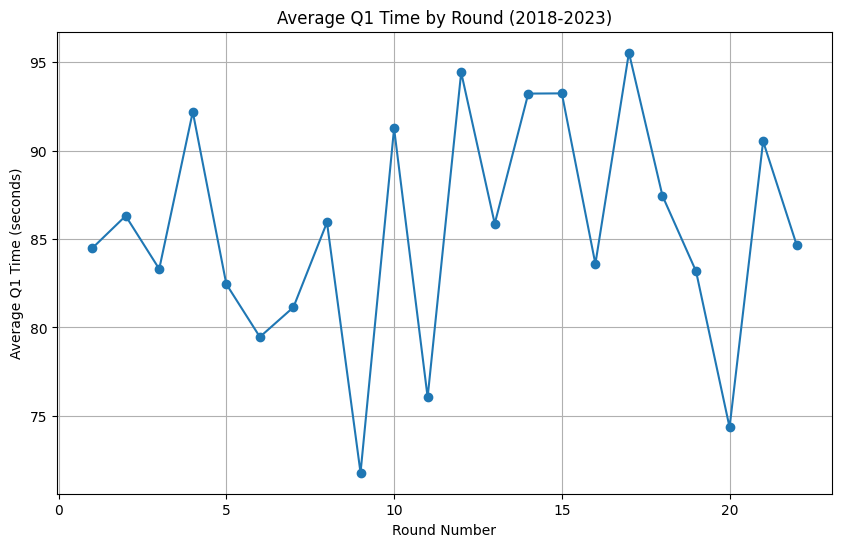

In [13]:

avg_q1_by_round = combined_data.groupby('round')['q1'].mean()
avg_q1_by_round.plot(kind='line', figsize=(10, 6), title='Average Q1 Time by Round (2018-2023)', marker='o')
plt.xlabel('Round Number')
plt.ylabel('Average Q1 Time (seconds)')
plt.grid(True)
plt.show()

<h5>Po ovoj analizi možemo vidjeti kako se kreće prosječno vrijeme kruga u Q1 kvalifikacijskoj rundi kroz sezonu. 

<h3>Analiza najdominantnijeg vozača po broju pole pozicija

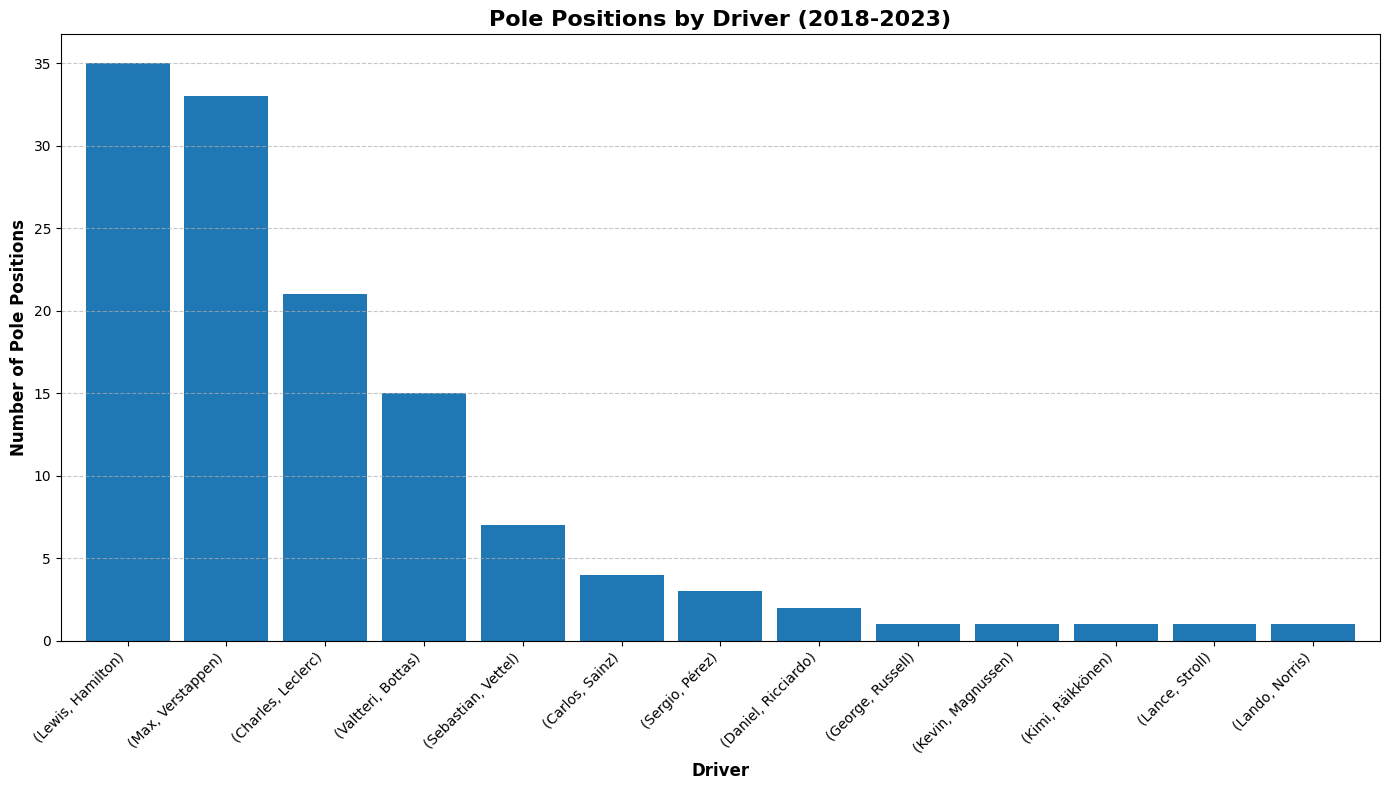

In [14]:

pole_positions = combined_data[combined_data['position'] == 1]
dominant_drivers = pole_positions.groupby(['forename', 'surname']).size().sort_values(ascending=False)

dominant_drivers.plot(kind='bar', figsize=(14, 8), colormap='tab20', width=0.85)
plt.title('Pole Positions by Driver (2018-2023)', fontsize=16, fontweight='bold')
plt.xlabel('Driver', fontsize=12, fontweight='bold')
plt.ylabel('Number of Pole Positions', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h5>Ovom analizom utvrđujemo kako je vozač s najviše pole pozicija odnosno najbržim krugom Lewis Hamilton.

<h3>Trendovi napretka 5 vozača u Q1

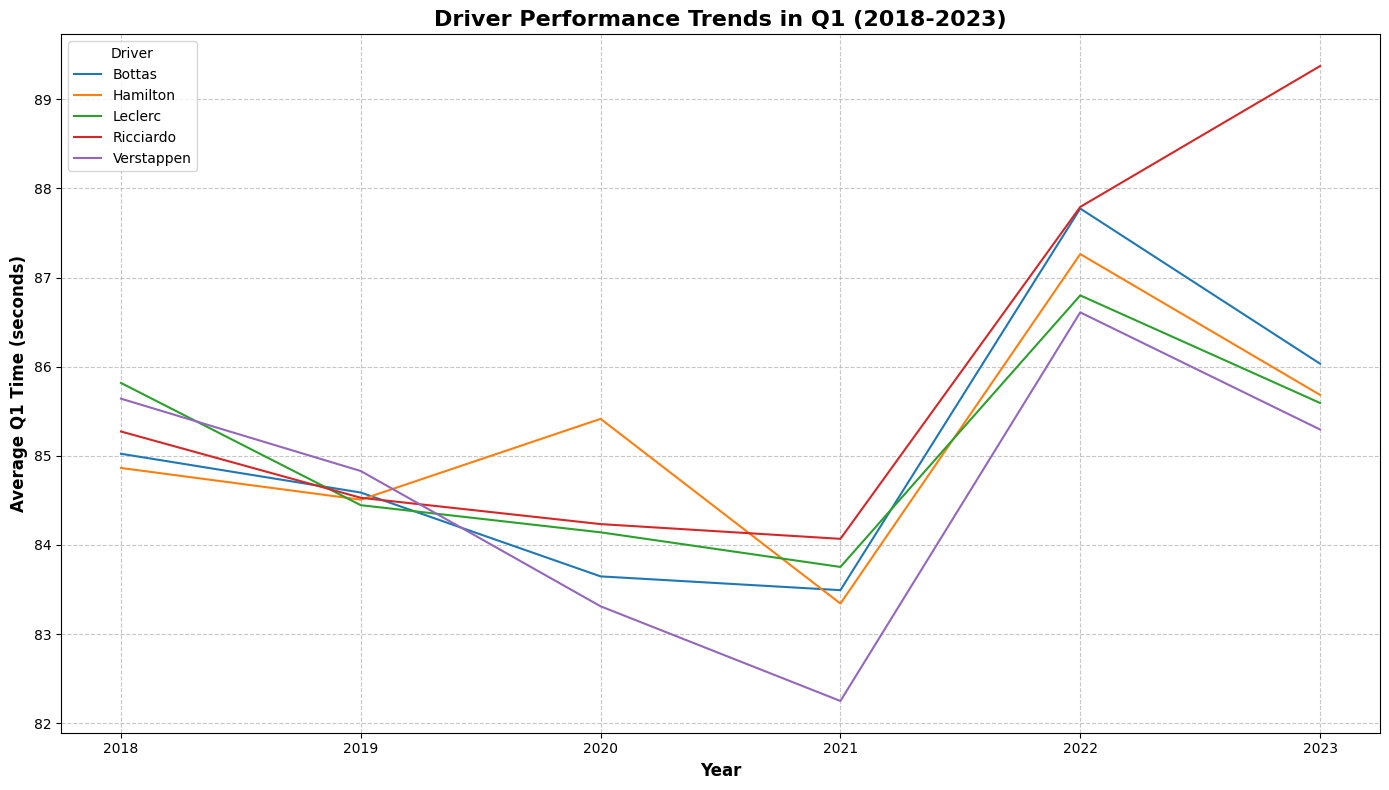

In [15]:
selected_drivers = ['Hamilton', 'Bottas', 'Leclerc', 'Verstappen', 'Ricciardo']
avg_q1_by_year_driver = combined_data.groupby(['year', 'surname'])['q1'].mean().reset_index()

avg_q1_by_year_driver = avg_q1_by_year_driver[avg_q1_by_year_driver['surname'].isin(selected_drivers)]

pivot_data = avg_q1_by_year_driver.pivot(index='year', columns='surname', values='q1')

plt.figure(figsize=(14, 8))
pivot_data.plot(ax=plt.gca(), title='Driver Performance Trends in Q1 (2018-2023)')
plt.title('Driver Performance Trends in Q1 (2018-2023)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Average Q1 Time (seconds)', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Driver', fontsize=10, loc='upper left')
plt.tight_layout()
plt.show()

<h5>U ovoj analizi uzeli smo 5 vozača: Lewis Hamilton, Valtteri Bottas, Max Verstappen, Daniel Ricciardo i Charles Leclerc. Jedina odstupanja na grafu su Hamilton koji je bio malo sporiji u 2020. sezoni tijekom Q1 kvalifikacija i Daniel Ricciardo koji je imao sporije prosječno vrijeme kvalifikacija u 2023. sezoni. Uzevši sve u obzir možemo vidjeti da su odstupanja minimalna što bi bio pokazatelj nevjerojatne konzistencije kod vozača.

<h3>10 najbržih utrka po vremenima kvalifikacija

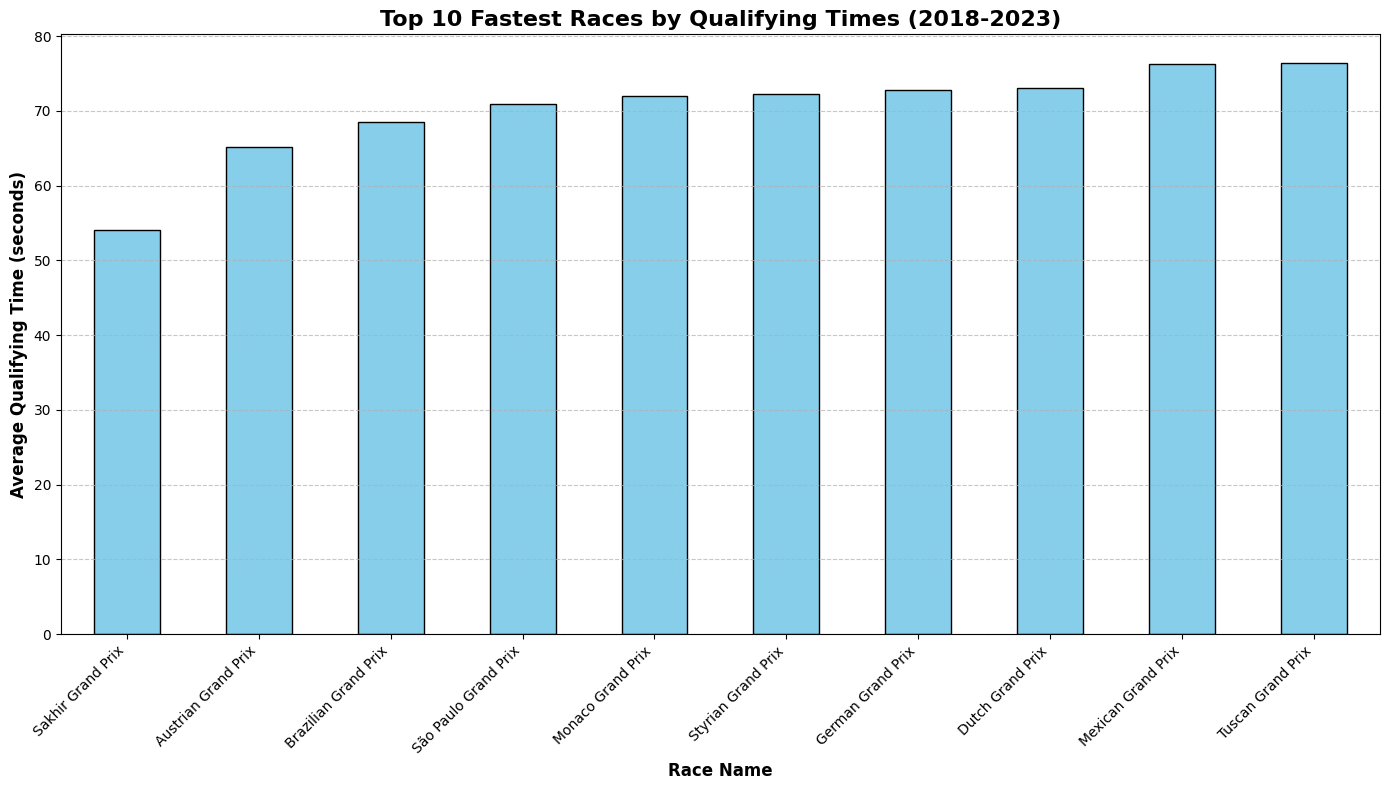

In [16]:
fastest_races = combined_data.groupby('name')[['q1', 'q2', 'q3']].mean()
fastest_races['average_time'] = fastest_races.mean(axis=1)
fastest_races = fastest_races.sort_values(by='average_time').head(10)

plt.figure(figsize=(14, 8))
fastest_races['average_time'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Fastest Races by Qualifying Times (2018-2023)', fontsize=16, fontweight='bold')
plt.xlabel('Race Name', fontsize=12, fontweight='bold')
plt.ylabel('Average Qualifying Time (seconds)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h5>Ovdje ponavljamo raniju analizu ali ćemo ograničiti na 10 najbržih utrka i uzet ćemo u obzir prosječne brzine sve tri kvalifikacijske runde za sve utrke. Možemo vidjeti da se redoslijed minimalno izmjenio gdje su Monaco GP i Styrian GP zamijenili mjesta, isto kao i Tuscan Gp i Mexico GP.

<h3>Razlike u prosječnim vremenima kvalifikacija za utrku SPA Francorchamps

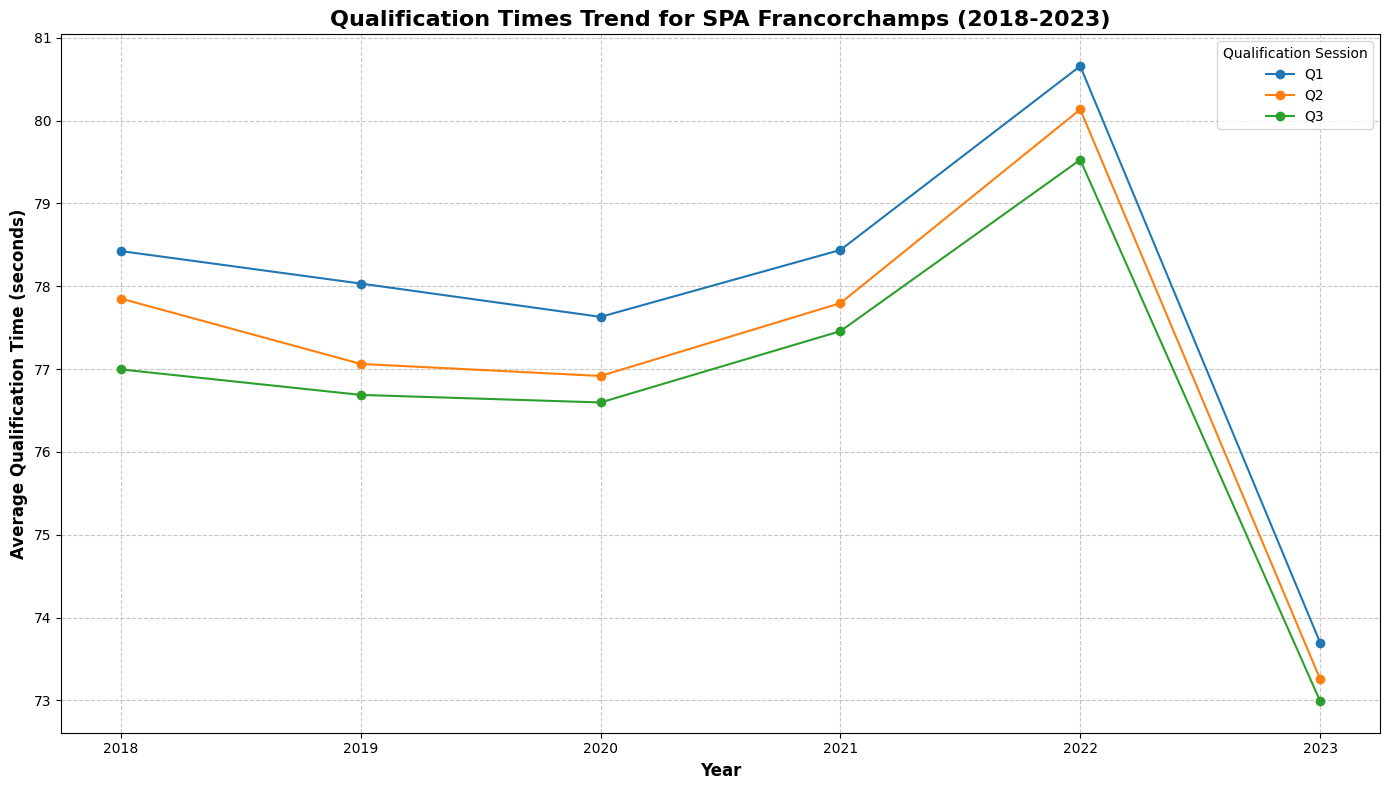

In [17]:
spa_data = combined_data[combined_data['name'].str.contains('SPA', case=False, na=False)]

avg_times_by_year = spa_data.groupby('year')[['q1', 'q2', 'q3']].mean().reset_index()

plt.figure(figsize=(14, 8))
plt.plot(avg_times_by_year['year'], avg_times_by_year['q1'], marker='o', label='Q1')
plt.plot(avg_times_by_year['year'], avg_times_by_year['q2'], marker='o', label='Q2')
plt.plot(avg_times_by_year['year'], avg_times_by_year['q3'], marker='o', label='Q3')

plt.title('Qualification Times Trend for SPA Francorchamps (2018-2023)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Average Qualification Time (seconds)', fontsize=12, fontweight='bold')
plt.xticks(avg_times_by_year['year'], fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Qualification Session', fontsize=10)
plt.tight_layout()
plt.show()

<h5>U ovoj analizi možemo vidjeti kako se kreću prosječna vremena na utrci SPA Francorchamps ili Belgian GP kroz godine. Kao što možemo vidjeti 2018, 2019, 2020 i 2021 su vremena vrlo slična dok u 2022 imamo dosta sporija vremena i onda u 2023 dosta brža vremena.

<h2>Uvođenje novog dataseta s vremenom

In [18]:
weather_data = pd.read_json('F1 Weather(2023-2018).json')

In [19]:
weather_data

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,Round Number,Year
0,0 days 00:00:57.060000,24.1,36.2,997.1,False,38.2,294,3.0,1,2018
1,0 days 00:01:57.078000,24.0,36.3,997.1,False,38.6,273,1.4,1,2018
2,0 days 00:02:57.090000,24.0,36.3,997.1,False,38.6,273,1.4,1,2018
3,0 days 00:03:57.106000,23.9,37.2,997.0,False,38.7,287,2.3,1,2018
4,0 days 00:04:57.121000,24.2,35.8,997.1,False,38.7,309,3.5,1,2018
...,...,...,...,...,...,...,...,...,...,...
18209,0 days 02:31:06.568000,26.4,54.0,1015.7,False,30.8,279,1.7,22,2023
18210,0 days 02:32:06.583000,26.4,54.0,1015.7,False,30.8,283,1.8,22,2023
18211,0 days 02:33:06.567000,26.4,54.0,1015.7,False,30.6,314,1.5,22,2023
18212,0 days 02:34:06.581000,26.4,54.0,1015.7,False,30.6,273,1.5,22,2023


In [20]:
weather_data.columns

Index(['Time', 'AirTemp', 'Humidity', 'Pressure', 'Rainfall', 'TrackTemp',
       'WindDirection', 'WindSpeed', 'Round Number', 'Year'],
      dtype='object')

<h3>Dodajemo prvom datasetu novi dataset s vremenom

In [21]:
def combined_data_weather(weather_data, combined_data):
    merged_data = pd.merge(combined_data, weather_data, 
                           left_on=['year', 'round'], 
                           right_on=['Year', 'Round Number'], 
                           how='inner')
    return merged_data

merged_weather_data = combined_data_weather(weather_data, combined_data)


<h3>Količina kiše za Q3 SPA Francorchamps po godinama

<h4>Kako bismo ustanovili postoji li korelacija između vremena sa brzinom kruga na kvalifikacijama Belgian GP provjeriti ćemo koliko je kiše palo na datum kada su se održale.

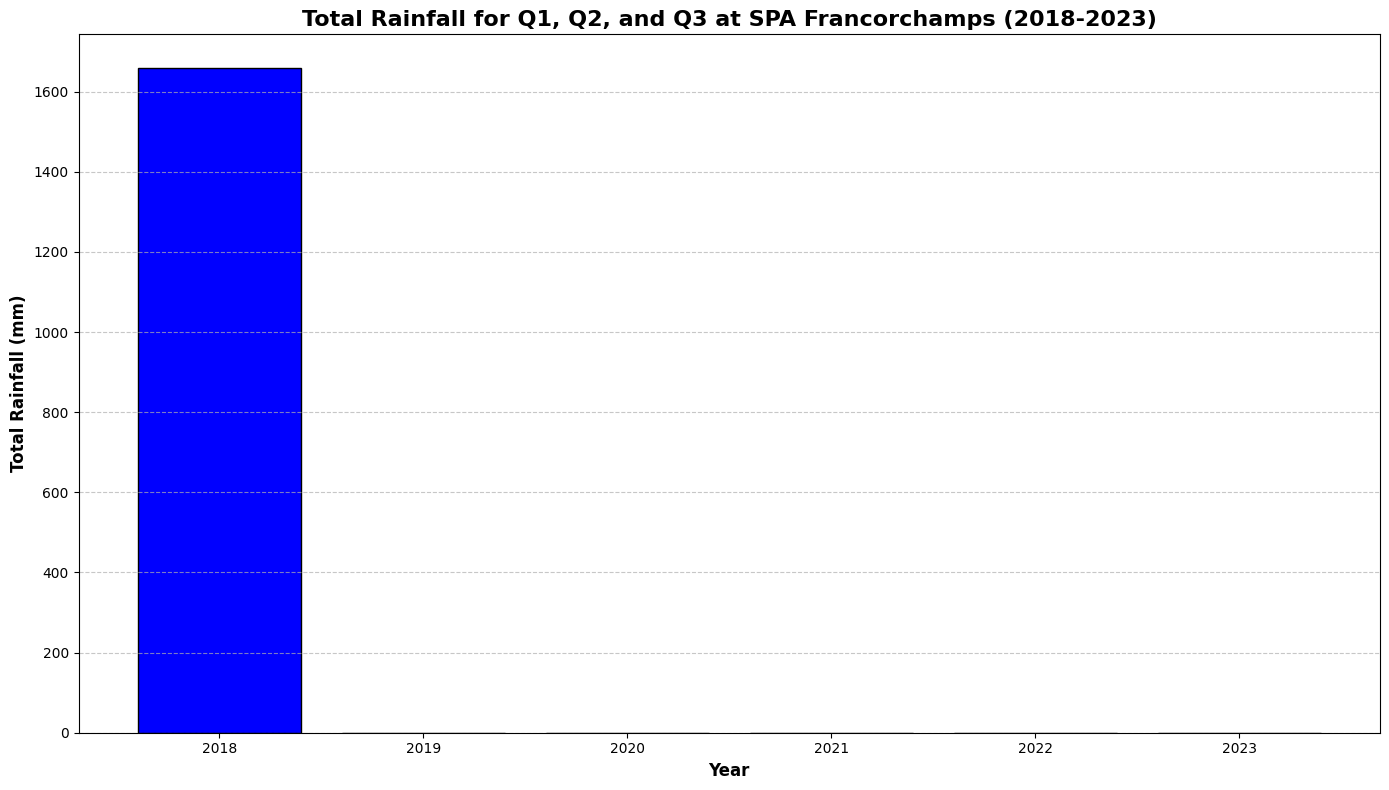

In [22]:
spa_data = merged_weather_data[merged_weather_data['name'].str.contains('SPA', case=False, na=False)]

rainfall_by_year = spa_data.groupby('year')['Rainfall'].sum().reset_index()

plt.figure(figsize=(14, 8))
plt.bar(rainfall_by_year['year'], rainfall_by_year['Rainfall'], color='blue', edgecolor='black')

plt.title('Total Rainfall for Q1, Q2, and Q3 at SPA Francorchamps (2018-2023)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Total Rainfall (mm)', fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

<h5>Možemo vidjeti da jedino kada je zabilježen pad kiše je 2018 što znači da nema direktne korelacije između podataka.

<h3>Prosječna temp staze SPA

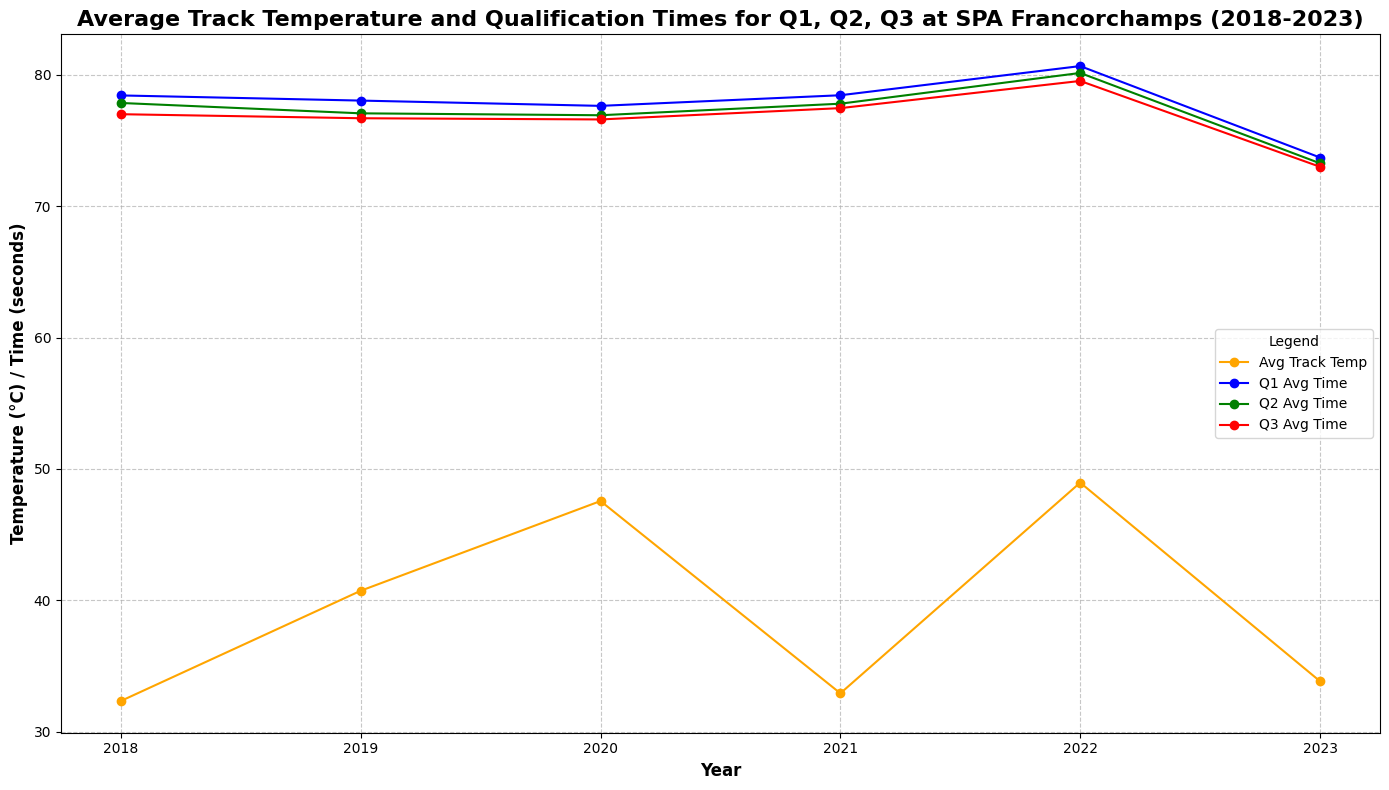

In [23]:
spa_data = merged_weather_data[merged_weather_data['name'].str.contains('SPA', case=False, na=False)]

tracktemp_by_year = spa_data.groupby('year').agg({
    'TrackTemp': 'mean',
    'q1': 'mean',
    'q2': 'mean',
    'q3': 'mean'
}).reset_index()

plt.figure(figsize=(14, 8))
plt.plot(tracktemp_by_year['year'], tracktemp_by_year['TrackTemp'], marker='o', label='Avg Track Temp', color='orange')
plt.plot(tracktemp_by_year['year'], tracktemp_by_year['q1'], marker='o', label='Q1 Avg Time', color='blue')
plt.plot(tracktemp_by_year['year'], tracktemp_by_year['q2'], marker='o', label='Q2 Avg Time', color='green')
plt.plot(tracktemp_by_year['year'], tracktemp_by_year['q3'], marker='o', label='Q3 Avg Time', color='red')

plt.title('Average Track Temperature and Qualification Times for Q1, Q2, Q3 at SPA Francorchamps (2018-2023)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Temperature (°C) / Time (seconds)', fontsize=12, fontweight='bold')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Legend', fontsize=10)
plt.tight_layout()
plt.show()

<h5>Možemo vidjeti kako na specifičnoj utrci također nema previše korelacije između temperature staze i brzine kruga.

<h3>Analiza odnosa temperature zraka i vremena Q3

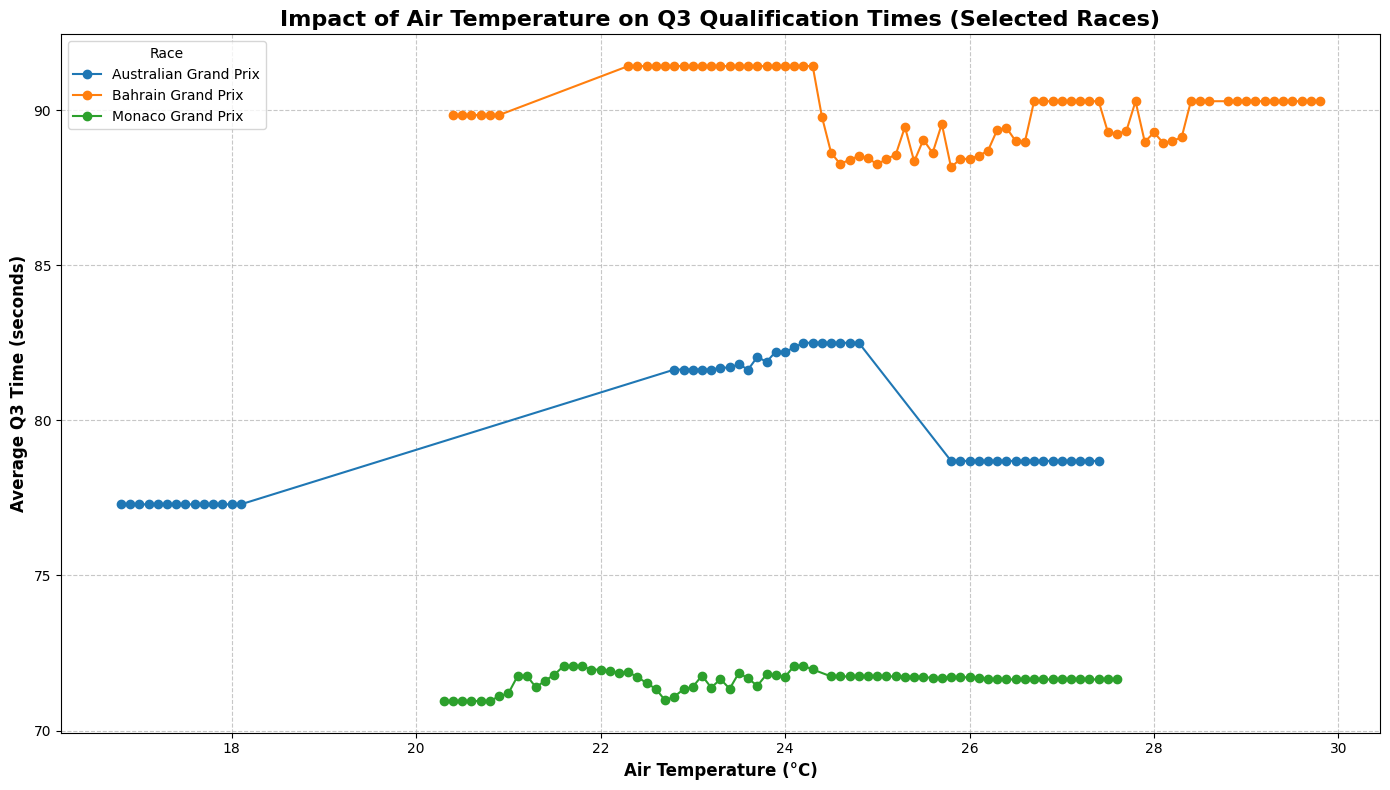

In [24]:
selected_races = ['Australian Grand Prix', 'Bahrain Grand Prix', 'Monaco Grand Prix']
selected_data = merged_weather_data[merged_weather_data['name'].isin(selected_races)]

avg_q3_by_airtemp_races = selected_data.groupby(['name', 'AirTemp'])['q3'].mean().reset_index()

plt.figure(figsize=(14, 8))
for race in selected_races:
        race_data = avg_q3_by_airtemp_races[avg_q3_by_airtemp_races['name'] == race]
        plt.plot(race_data['AirTemp'], race_data['q3'], marker='o', label=race)

plt.title('Impact of Air Temperature on Q3 Qualification Times (Selected Races)', fontsize=16, fontweight='bold')
plt.xlabel('Air Temperature (°C)', fontsize=12, fontweight='bold')
plt.ylabel('Average Q3 Time (seconds)', fontsize=12, fontweight='bold')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Race', fontsize=10)
plt.tight_layout()
plt.show()

<h5>Na ovoj analizi možemo vidjeti kako temperatura zraka utječe na kvalifikacijska vremena Q3 na utrkama Australian GP, Bahrain GP, Monaco GP. Bitno je razlučiti kako u ovom slučaju ne uzimamo temperaturu staze nego zraka. To je bitno naglasiti jer je za očekivati da s nižom temperaturom zraka dobivamo brže krugove i obrnuto, dok za temperaturu staze generalno vrijedi da veća temperatura staze znači brža vremena.

<h3>Omjer temperature staze i najbržeg kruga

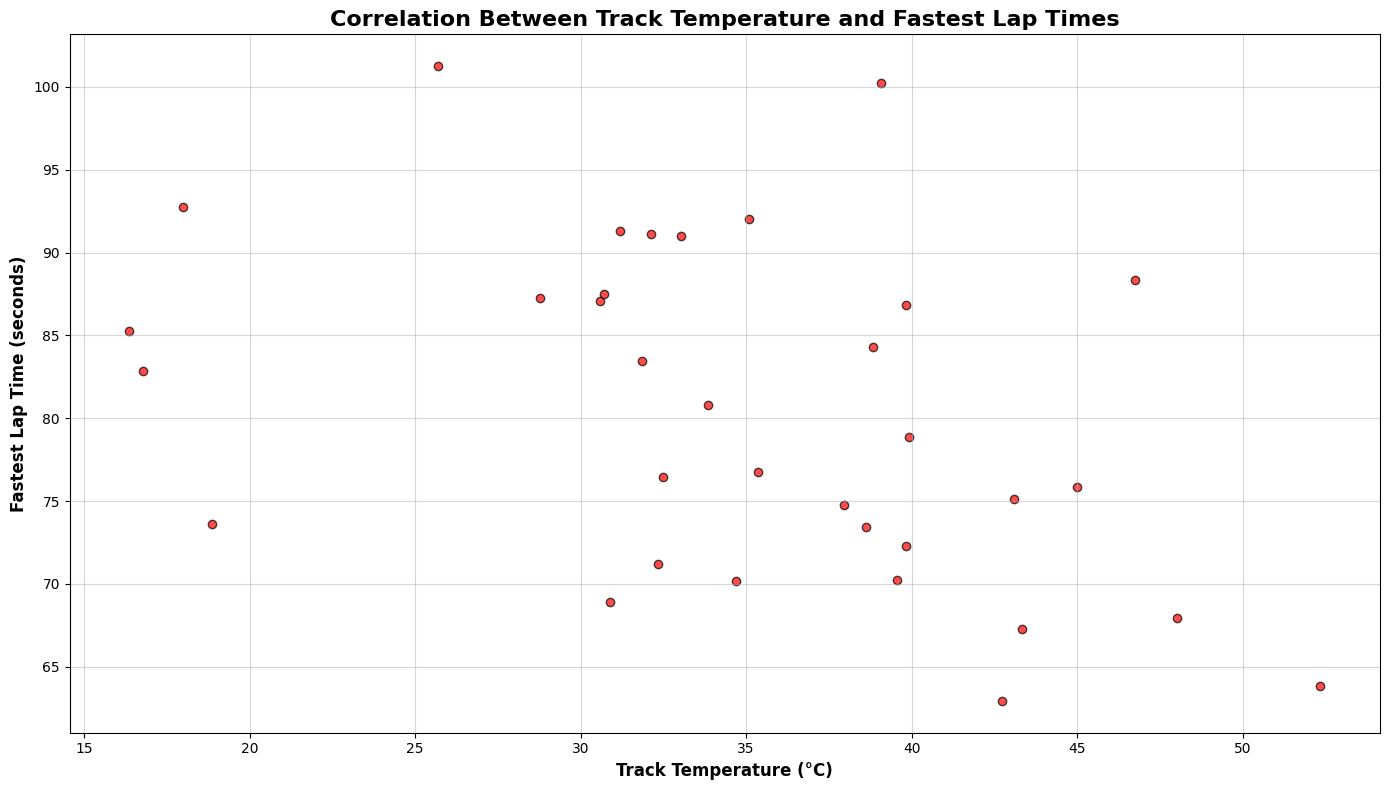

Correlation coefficient between track temperature and fastest lap times: -0.43


In [25]:
merged_weather_data['fastest_lap'] = merged_weather_data[['q1', 'q2', 'q3']].min(axis=1)

race_temp_lap = merged_weather_data.groupby('name').agg({
    'TrackTemp': 'mean',
    'fastest_lap': 'min'
}).reset_index()

plt.figure(figsize=(14, 8))
plt.scatter(race_temp_lap['TrackTemp'], race_temp_lap['fastest_lap'], color='red', edgecolor='black', alpha=0.7)
plt.title('Correlation Between Track Temperature and Fastest Lap Times', fontsize=16, fontweight='bold')
plt.xlabel('Track Temperature (°C)', fontsize=12, fontweight='bold')
plt.ylabel('Fastest Lap Time (seconds)', fontsize=12, fontweight='bold')
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

correlation = race_temp_lap['TrackTemp'].corr(race_temp_lap['fastest_lap'])
print(f"Correlation coefficient between track temperature and fastest lap times: {correlation:.2f}")

<h5>U ovoj analizi gledamo korelaciju između temperature staze i prosjeka najbržih krugova. Rezultat korelacije je -0.43 što označava umjerenu negativnu povezanost između temperature staze i najbržih vremena. Odnosno kako temperatura staze raste tako se vremena krugova smanjuju što je nešto što bi očekivali.

<h3>Utjecaj količine kiše na quali rezultat

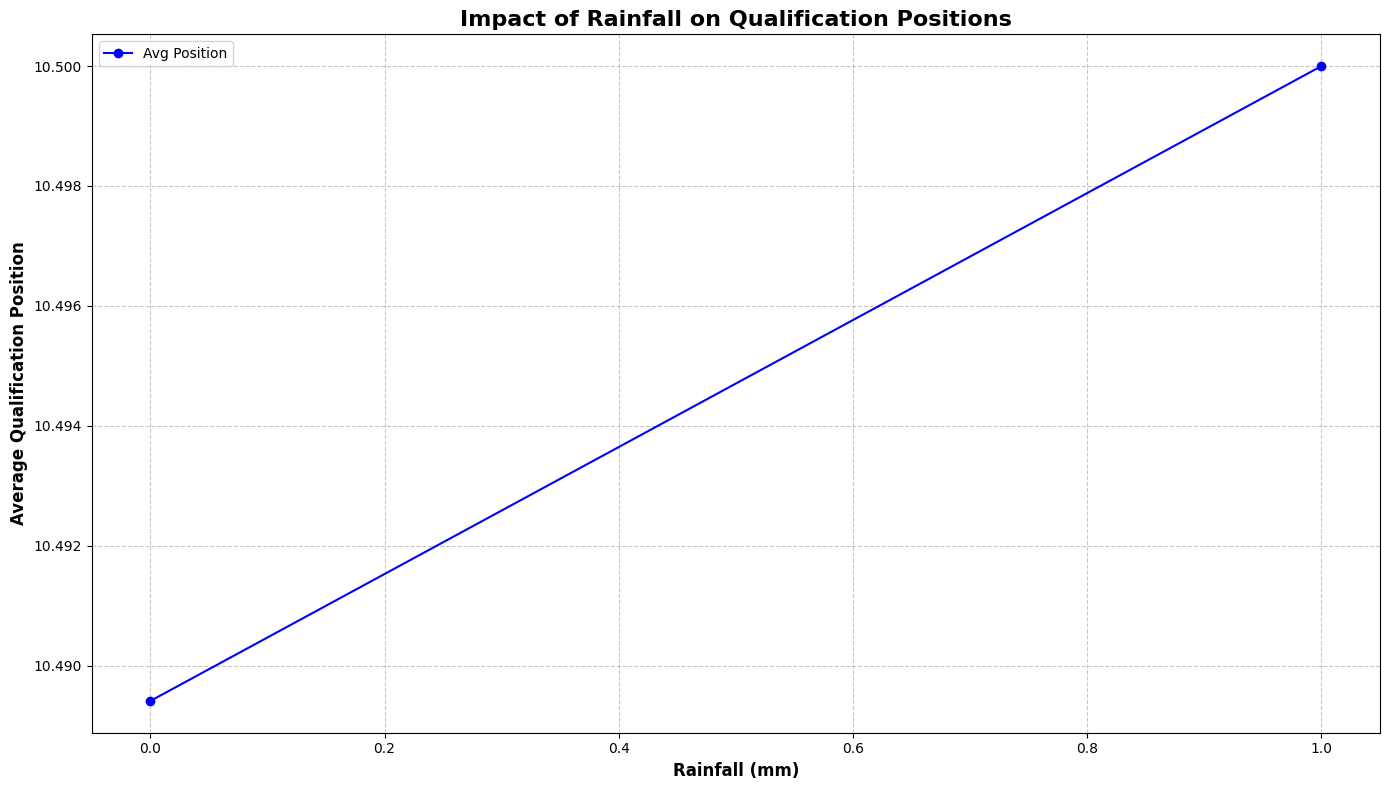

In [26]:
rainfall_position_data = merged_weather_data[['Rainfall', 'position']]

rainfall_position_data = rainfall_position_data.dropna()

avg_position_by_rainfall = rainfall_position_data.groupby('Rainfall')['position'].mean().reset_index()

plt.figure(figsize=(14, 8))
plt.plot(avg_position_by_rainfall['Rainfall'], avg_position_by_rainfall['position'], marker='o', color='blue', label='Avg Position')

plt.title('Impact of Rainfall on Qualification Positions', fontsize=16, fontweight='bold')
plt.xlabel('Rainfall (mm)', fontsize=12, fontweight='bold')
plt.ylabel('Average Qualification Position', fontsize=12, fontweight='bold')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

<h5>U ovoj analizi možemo vidjeti kako se količina kiše odnosi na prosječnu poziciju vozača i vidimo da povećanjem količine kiše prosječna pozicija se povećava. Doduše ovo nije najbolji prikaz performansi vozača tako da ćemo bolje prikazati odnos performansi i količine kiše na idućoj analizi.

<h3>Utjecaj kiše na quali vremena za turkish gp

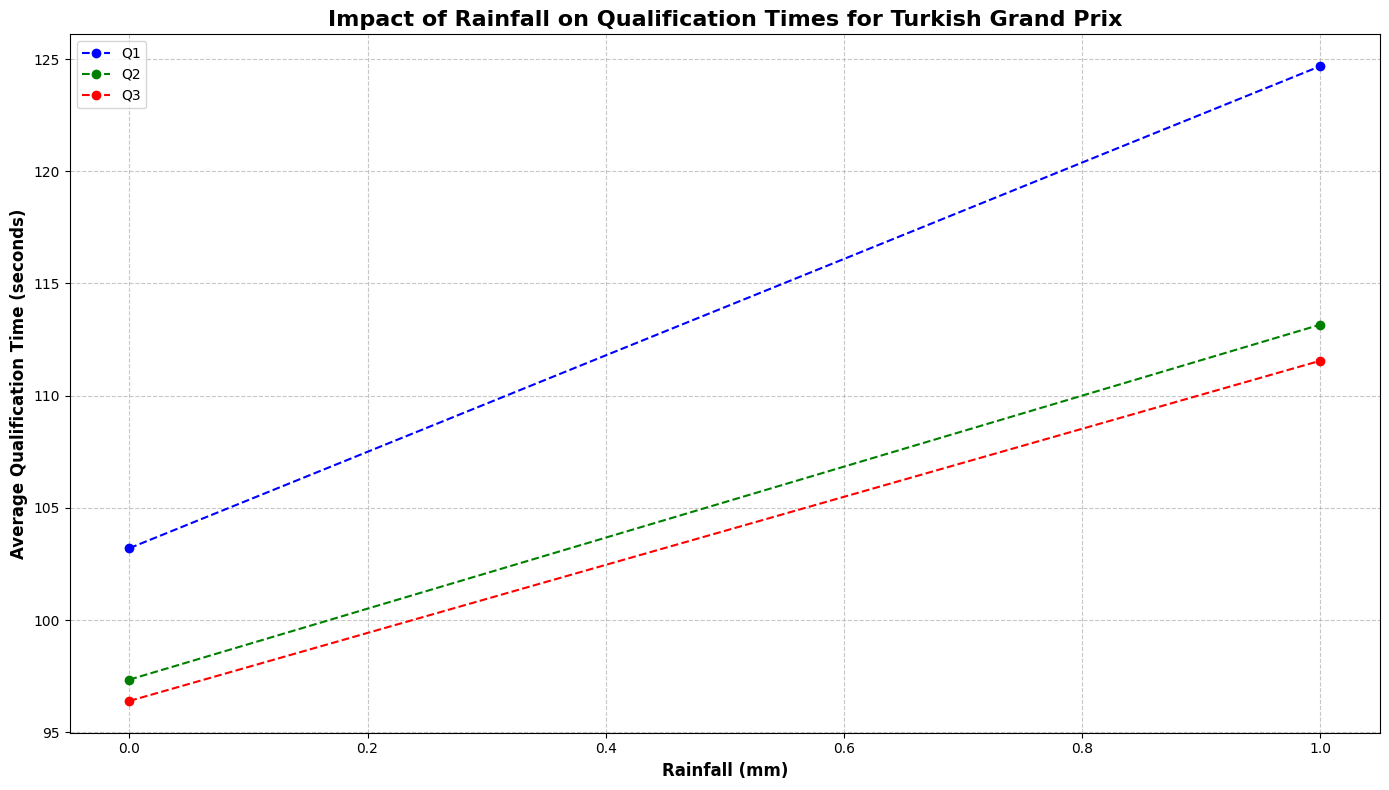

In [27]:
selected_data = merged_weather_data[merged_weather_data['name'] == 'Turkish Grand Prix']

rainfall_time_data = selected_data[['Rainfall', 'q1', 'q2', 'q3']]

rainfall_time_data = rainfall_time_data.dropna()

avg_times_by_rainfall = rainfall_time_data.groupby('Rainfall').mean().reset_index()

plt.figure(figsize=(14, 8))
plt.plot(avg_times_by_rainfall['Rainfall'], avg_times_by_rainfall['q1'], marker='o', label='Q1', linestyle='--', color='blue')
plt.plot(avg_times_by_rainfall['Rainfall'], avg_times_by_rainfall['q2'], marker='o', label='Q2', linestyle='--', color='green')
plt.plot(avg_times_by_rainfall['Rainfall'], avg_times_by_rainfall['q3'], marker='o', label='Q3', linestyle='--', color='red')

plt.title('Impact of Rainfall on Qualification Times for Turkish Grand Prix', fontsize=16, fontweight='bold')
plt.xlabel('Rainfall (mm)', fontsize=12, fontweight='bold')
plt.ylabel('Average Qualification Time (seconds)', fontsize=12, fontweight='bold')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

<h5>U ovoj analizi smo uzeli prosječna vremena kvalifikacija kroz godine za utrku Turkish GP. Možemo vidjeti da količina kiše koja je pala direktno utječe na trajanje kruga. S povećanjem količine kiše tako krugovi su sve sporiji i sporiji što je za očekivati.

<h3>Tlak zraka i kvalifikacijska vremena

Correlation between Air Pressure and Pole Positions for Australian Grand Prix: 0.00
Correlation between Air Pressure and Pole Positions for Turkish Grand Prix: -0.00
Correlation between Air Pressure and Pole Positions for Monaco Grand Prix: -0.01


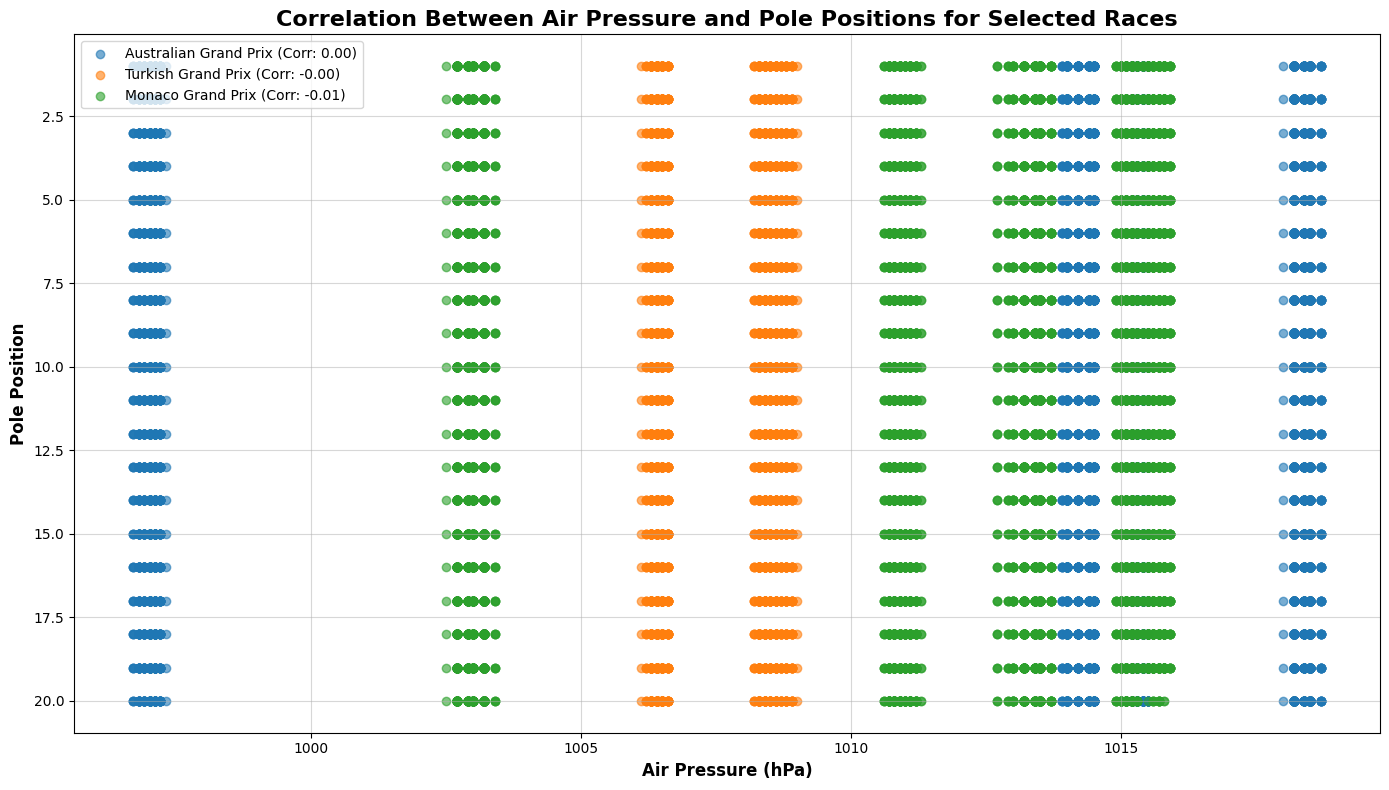

In [28]:
selected_races = ['Australian Grand Prix', 'Turkish Grand Prix', 'Monaco Grand Prix']
selected_data = merged_weather_data[merged_weather_data['name'].isin(selected_races)]

pressure_position_data = selected_data[['Pressure', 'position', 'name']]

pressure_position_data = pressure_position_data.dropna()

correlations = {}
for race in selected_races:
        race_data = pressure_position_data[pressure_position_data['name'] == race]
        correlation = race_data['Pressure'].corr(race_data['position'])
        correlations[race] = correlation

for race, corr in correlations.items():
        print(f"Correlation between Air Pressure and Pole Positions for {race}: {corr:.2f}")

plt.figure(figsize=(14, 8))
for race in selected_races:
        race_data = pressure_position_data[pressure_position_data['name'] == race]
        plt.scatter(race_data['Pressure'], race_data['position'], alpha=0.6, label=f'{race} (Corr: {correlations[race]:.2f})')

plt.title('Correlation Between Air Pressure and Pole Positions for Selected Races', fontsize=16, fontweight='bold')
plt.xlabel('Air Pressure (hPa)', fontsize=12, fontweight='bold')
plt.ylabel('Pole Position', fontsize=12, fontweight='bold')
plt.gca().invert_yaxis() 
plt.grid(alpha=0.5)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

<h5>U ovoj analizi htjeli smo istražiti postoji li korelacija između performansi vozača i tlaka zraka. Kao uzorak smo uzeli 3 utrke Australian GP, Turkish GP i Monaco GP. Iz grafa i dobivenog rezultata možemo vidjeti da nema gotovo nikakve korelacije između tlaka zraka i performansi vozača.

<h2>Kritički osvrt

<h4>Analizom ovih datasetova uspjeli smo utvrditi da temperatura staze i količina kiše utječu na performanse vozača. Za neke druge parametre poput utjecaja tlaka zraka nismo uspjeli pronaći značajnu korelaciju. Što se tiče detaljnije analize bilo bi bolje da dataset sa podatcima vremena pokriva veći raspon nego što je trenutačno od 2018. do 2023. godine. Također bilo bi bolje da dataset sadrži podatke o postotcima vlažnosti staze jer bi nam to prikazalo punu sliku utjecaja raznih vremenskih uvjeta na performanse.

<h2>Postavljanje na bazu

In [29]:
pip install flask_restful

Note: you may need to restart the kernel to use updated packages.


<h3>Uvoz u podataka u bazu

In [30]:
import sqlite3
import pandas as pd

qualifying_file_path = 'qualifying.csv'
drivers_file_path = 'drivers.csv'
races_file_path = 'races.csv'
weather_file_path = 'F1 Weather(2023-2018).json'

qualifying_data = pd.read_csv(qualifying_file_path)
drivers_data = pd.read_csv(drivers_file_path)
races_data = pd.read_csv(races_file_path)
weather_data = pd.read_json(weather_file_path)

conn = sqlite3.connect('f1_data.db')

qualifying_data.to_sql('Qualifying', conn, if_exists='replace', index=False)
drivers_data.to_sql('Drivers', conn, if_exists='replace', index=False)
races_data.to_sql('Races', conn, if_exists='replace', index=False)
weather_data.to_sql('Weather', conn, if_exists='replace', index=False)

conn.commit()
conn.close()

print("Podaci su dodani")

Podaci su dodani


<h3>Pokretanje flask servera

In [31]:
from flask import Flask, jsonify
import sqlite3

app = Flask(__name__)

def connect_db():
    conn = sqlite3.connect('f1_data.db')
    conn.row_factory = sqlite3.Row 
    return conn

@app.route('/qualifying', methods=['GET'])
def get_qualifying():
    try:
        conn = connect_db()
        cursor = conn.cursor()
        
        cursor.execute("SELECT * FROM Qualifying")
        rows = cursor.fetchall()
        
        qualifying = [dict(row) for row in rows]
        
        return jsonify(qualifying), 200
    except Exception as e:
        return jsonify({"error": str(e)}), 500
    finally:
        conn.close()

@app.route('/drivers', methods=['GET'])
def get_drivers():
    try:
        conn = connect_db()
        cursor = conn.cursor()
        
        cursor.execute("SELECT * FROM Drivers")
        rows = cursor.fetchall()
        
        drivers = [dict(row) for row in rows]
        
        return jsonify(drivers), 200
    except Exception as e:
        return jsonify({"error": str(e)}), 500
    finally:
        conn.close()

@app.route('/races', methods=['GET'])
def get_races():
    try:
        conn = connect_db()
        cursor = conn.cursor()
        
        cursor.execute("SELECT * FROM Races")
        rows = cursor.fetchall()
        
        races = [dict(row) for row in rows]
        
        return jsonify(races), 200
    except Exception as e:
        return jsonify({"error": str(e)}), 500
    finally:
        conn.close()

@app.route('/weather', methods=['GET'])
def get_weather():
    try:
        conn = connect_db()
        cursor = conn.cursor()
        
        cursor.execute("SELECT * FROM Weather")
        rows = cursor.fetchall()
        
        weather = [dict(row) for row in rows]
        
        return jsonify(weather), 200
    except Exception as e:
        return jsonify({"error": str(e)}), 500
    finally:
        conn.close()

if __name__ == '__main__':
    app.run(debug=True, port=5001, use_reloader=False)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5001
Press CTRL+C to quit
127.0.0.1 - - [26/Jan/2025 17:24:04] "GET /races HTTP/1.1" 200 -
127.0.0.1 - - [26/Jan/2025 17:24:09] "GET /qualifying HTTP/1.1" 200 -
127.0.0.1 - - [26/Jan/2025 17:24:16] "GET /drivers HTTP/1.1" 200 -
127.0.0.1 - - [26/Jan/2025 17:24:25] "GET /weather HTTP/1.1" 200 -


<h5>Možemo vidjeti da se server uspješno pokrenuo i prikazao podatke na sve 4 putanje za dodane podatke.

<h2>Zaključak

<h4>Ovim projektom smo naučili kako možemo kombinirati podatke iz više datasetova od jednog. Također koristili smo heterogene tipove podataka i pokazivali smo određene korelacije između njih. U našim datasetovima pronašli smo korelacije između temperature staze, količine kiše i performansi vozača u vidu njihovih kvalifikacijskih rezultata. Također raznim analizama nad samo prvim datasetom prikazali smo odnose između podataka. Za daljnju analizu bilo bi potrebno koristiti opširniji dataset za podatke o vremenu koji bi uključivali i podatke o vlažnosti same staze. Kada bi to bilo moguće ovakve analize bi definitivno bile od koristi timovima koji se natječu radi bolje procjene taktike tijekom utrka.

<h2>Literatura

<h5>W. McKinney, Python for Data Analysis, 3rd ed. O’Reilly Media, 2023. [Online]. Available: https://wesmckinney.com/book/. Accessed: Jan. 25, 2025.
<h5>A. B. Downey, Think Stats: Probability and Statistics for Programmers, 3rd ed.. Green Tea Press, 2023. [Online]. Available: https://greenteapress.com/wp/think-stats-3e/ Accessed: Jan. 25, 2025.